# Install pre-reqs

In [1]:
!pip install qmpy
!pip install qmpy_rester

  Using cached qmpy-1.4.0-py3-none-any.whl (12.7 MB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
  Using cached mysqlclient-2.2.0-cp310-cp310-win_amd64.whl (199 kB)
  Using cached django_crispy_forms-2.0-py3-none-any.whl (31 kB)
  Using cached Django-2.2.28-py3-none-any.whl (7.5 MB)
  Using cached djangorestframework_xml-2.0.0-py2.py3-none-any.whl (6.0 kB)
  Using cached pygraphviz-1.11.zip (120 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached djangorestframework_yaml-2.0.0-py2.py3-none-any.whl (6.7 kB)
  Using cached django_extensions-3.2.3-py3-none-any.whl (229 kB)
  Using cached ase-3.22.1-py3-none-any.whl (2.2 MB)
  Using cached djangorestframework-3.14.0-py3-none-any.whl (1.1 MB)
  Using cached djangorestframework_filters-0.11.1-py2.py3-none-any.whl (12 kB)
  Using cached django_extensions-3.2.1-py3-none-any.whl (229 kB)
  Using cached django_extensions-3.2.0-py3-none-any.whl (229 kB)
  Using ca

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [48 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-310
  creating build\lib.win-amd64-cpython-310\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-cpython-310\pygraphviz
  copying pygraphviz\graphviz.py -> build\lib.win-amd64-cpython-310\pygraphviz
  copying pygraphviz\scraper.py -> build\lib.win-amd64-cpython-310\pygraphviz
  copying pygraphviz\testing.py -> build\lib.win-amd64-cpython-310\pygraphviz
  copying pygraphviz\__init__.py -> build\lib.win-amd64-cpython-310\pygraphviz
  creating build\lib.win-amd64-cpython-310\pygraphviz\tests
  copying pygraphviz\tests\test_attribute_defaults.py -> build\lib.win-amd64-cpython-310\pygraphviz\tests
  copying pygraphviz\tests\test_clear.py -> build\lib.win-amd64-cpython-310\pygraphviz\tests
  copying pygraphviz\tests\test_close.py 

In [2]:
import requests
import pandas as pd
import concurrent.futures

# Get SuperCon data

In [3]:
# df_stable_mp_matches.to_csv('output_revised.csv')
df_non_doped_materials = pd.read_json("C:/Users/Droor/OneDrive - Harvard University/Desktop/Master Folder/College (2022-2026)/Hoffman summer/git-clone/superconductors-ml/datasets/non_doped_materials.json")

In [4]:
df_non_doped_materials.shape

(2105, 8)

In [5]:
df_non_doped_materials.head()

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count
0,[18852],Ag1B2,Ag1B2,"{'Ag': 1.0, 'B': 2.0}",6.7,6.7,0.0,1
1,[20016],Ag1Ba2Ca2Cu3O9-z,Ag1Ba2Ca2Cu3O9,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 2.0, 'Cu': 3.0, '...",110.0,110.0,0.0,1
2,[20017],Ag1Ba2Ca3Cu4O11-z,Ag1Ba2Ca3Cu4O11,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 3.0, 'Cu': 4.0, '...",117.0,117.0,0.0,1
3,[20018],Ag1Ba2Ca4Cu5O13-z,Ag1Ba2Ca4Cu5O13,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 4.0, 'Cu': 5.0, '...",105.0,105.0,0.0,1
4,[20019],Ag1Ba2Ca5Cu6O15-z,Ag1Ba2Ca5Cu6O15,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 5.0, 'Cu': 6.0, '...",80.0,80.0,0.0,1


# Query OQMD function definitions

In [16]:
def convert_material_dict_to_element_set(material_dict):
    elements = list(material_dict.keys())
    element_set = "(" + ",".join(elements) + ")"
    return element_set

# Define the base URL and endpoint
base_url = "http://oqmd.org"
endpoint = "/oqmdapi/formationenergy"

# Define the query parameters
fields = "name,entry_id,volume,stability,band_gap,delta_e,sites,unit_cell"

def get_json_oqmd(material_dict):
    element_set = convert_material_dict_to_element_set(material_dict)
    filter_params = f"element_set={element_set} AND ntypes={len(material_dict)}&sort_by=delta_e"

    # Build the complete URL
    url = f"{base_url}{endpoint}?fields={fields}&filter={filter_params}"

    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        docs = response.json()
        # Process the retrieved data as needed
        return docs
    else:
        return "Error occurred: " + response.text

# Query OQMD examples:

In [17]:
get_json_oqmd({'Na': 1.0, 'Cl': 1.0})

{'links': {'next': None,
  'previous': None,
  'base_url': {'href': 'https://oqmd.org/oqmdapi',
   'meta': {'_oqmd_version': '1.0'}}},
 'resource': {},
 'data': [{'name': 'NaCl',
   'entry_id': 1105292,
   'volume': 44.8931,
   'unit_cell': [[0.0, 2.820871, 2.820871],
    [2.820871, 0.0, 2.820871],
    [2.820871, 2.820871, 0.0]],
   'sites': ['Cl @ 0 0 0', 'Na @ 0.5 0.5 0.5'],
   'band_gap': 5.177,
   'delta_e': -2.05061417323539,
   'stability': 0.0},
  {'name': 'NaCl',
   'entry_id': 3735,
   'volume': 44.5528,
   'unit_cell': [[2.813726, -2.813726, 0.0],
    [-2.813726, 0.0, -2.813726],
    [2.813726, 2.813726, 0.0]],
   'sites': ['Cl @ 0.5 0 0.5', 'Na @ 0 0 0'],
   'band_gap': 5.246,
   'delta_e': -2.05010813823539,
   'stability': 0.0005060349999999048},
  {'name': 'NaCl',
   'entry_id': 327191,
   'volume': 44.6863,
   'unit_cell': [[1.976377, 1.141062, 3.302514],
    [-1.976377, 1.141062, 3.302514],
    [0.0, -2.282123, 3.302514]],
   'sites': ['Cl @ 0 0 0', 'Na @ 0.5 0.5 0.5'],

# Query OQMD in our database.

In [8]:
%%time

# List of material dictionaries
material_dicts = df_non_doped_materials['material_dict'].head(10).tolist()

# Initialize a large list of allllll the data back
results = []

# Use concurrent execution to process the material dictionaries
with concurrent.futures.ThreadPoolExecutor() as executor:
#     # Submit tasks for each material dictionary
#     futures = [executor.submit(get_json_oqmd, material_dict) for material_dict in material_dicts]
#     for future in concurrent.futures.as_completed(futures):
#         result = future.result()
#         results.append(result)
        
    # Submit tasks for each material dictionary and get the results in the original order
    for result in executor.map(get_json_oqmd, material_dicts):
        results.append(result)

CPU times: total: 203 ms
Wall time: 37.3 s


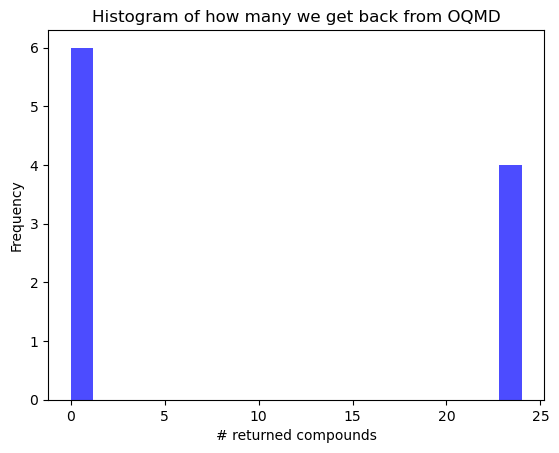

In [10]:
import matplotlib.pyplot as plt

# Create a long list of frequencies to make a histogram for
number_of_returned_compounds = []
for i in range(len(results)):
    number_of_returned_compounds.append(results[i]['meta']['data_returned'])
    
# Create histogram
plt.hist(number_of_returned_compounds, bins=20, alpha=0.7, color='blue')

# Set labels and title
plt.xlabel('# returned compounds')
plt.ylabel('Frequency')
plt.title('Histogram of how many we get back from OQMD')

# Display the plot
plt.show()

In [11]:
oqmd_name_list = []
oqmd_entry_id_list = []
volume_list = []
stability_list = []
bandgap_list = []

# Create lists to add as cols
# FAULty ASSUMPTION HERE: That the first of the returned materials is going to be most appropriate match to our SC material
# Only solace is that i've sorted by formation energy
for i in range(len(results)):
    if results[i]['data']:
        oqmd_entry_id_list.append(results[i]['data'][0]['entry_id'])
        volume_list.append(results[i]['data'][0]['volume'])
        stability_list.append(results[i]['data'][0]['stability'])
        bandgap_list.append(results[i]['data'][0]['band_gap'])
        oqmd_name_list.append(results[i]['data'][0]['name'])
    else:
        oqmd_entry_id_list.append(None)
        volume_list.append(None)
        stability_list.append(None)
        bandgap_list.append(None)
        oqmd_name_list.append(None)

# Add 3 columns to our original dataframe.
df_oqmd_first_matches = df_non_doped_materials.head(10)
df_oqmd_first_matches['oqmd_entry_id'] = oqmd_entry_id_list
df_oqmd_first_matches['volume'] = volume_list
df_oqmd_first_matches['stability'] = stability_list
df_oqmd_first_matches['band_gap'] = bandgap_list
df_oqmd_first_matches['oqmd_name'] = oqmd_name_list

C:\Users\Droor\AppData\Local\Temp\ipykernel_27752\746076763.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oqmd_first_matches['oqmd_entry_id'] = oqmd_entry_id_list
C:\Users\Droor\AppData\Local\Temp\ipykernel_27752\746076763.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oqmd_first_matches['volume'] = volume_list
C:\Users\Droor\AppData\Local\Temp\ipykernel_27752\746076763.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [12]:
df_oqmd_first_matches.head(50)

,sc_id,supercon_formula,cleaned_formula,material_dict,highest_Tc,average_Tc,std_Tc,entry_count,oqmd_entry_id,volume,stability,band_gap,oqmd_name
0,[18852],Ag1B2,Ag1B2,"{'Ag': 1.0, 'B': 2.0}",6.700,6.700,0.00,1,1472134.0,71.3192,0.351317,0.000,AgB6
1,[20016],Ag1Ba2Ca2Cu3O9-z,Ag1Ba2Ca2Cu3O9,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 2.0, 'Cu': 3.0, '...",110.000,110.000,0.00,1,NaN,NaN,NaN,NaN,None
2,[20017],Ag1Ba2Ca3Cu4O11-z,Ag1Ba2Ca3Cu4O11,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 3.0, 'Cu': 4.0, '...",117.000,117.000,0.00,1,NaN,NaN,NaN,NaN,None
3,[20018],Ag1Ba2Ca4Cu5O13-z,Ag1Ba2Ca4Cu5O13,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 4.0, 'Cu': 5.0, '...",105.000,105.000,0.00,1,NaN,NaN,NaN,NaN,None
4,[20019],Ag1Ba2Ca5Cu6O15-z,Ag1Ba2Ca5Cu6O15,"{'Ag': 1.0, 'Ba': 2.0, 'Ca': 5.0, 'Cu': 6.0, '...",80.000,80.000,0.00,1,NaN,NaN,NaN,NaN,None
5,[14670],Ag1Bi1,Ag1Bi1,"{'Ag': 1.0, 'Bi': 1.0}",2.780,2.780,0.00,1,1592507.0,130.3280,0.034619,0.000,Ag2Bi
6,[12785],Ag1Bi2,Ag1Bi2,"{'Ag': 1.0, 'Bi': 2.0}",3.000,3.000,0.00,1,1592507.0,130.3280,0.034619,0.000,Ag2Bi
7,[25718],La2Bi3Ag1S6O2,La2Bi3Ag1S6O2,"{'Ag': 1.0, 'Bi': 3.0, 'La': 2.0, 'O': 2.0, 'S...",0.500,0.500,0.00,1,1611799.0,147.2070,0.067443,0.806,LaAg2BiS2O2
8,[23623],Pb4Ag1Bi6Se14,Pb4Ag1Bi6Se14,"{'Ag': 1.0, 'Bi': 6.0, 'Pb': 4.0, 'Se': 14.0}",1.075,1.075,0.00,1,687498.0,826.3040,0.012811,0.537,Ag2Bi4PbSe8
9,"[14632, 14868]",Ag1In2,Ag1In2,"{'Ag': 1.0, 'In': 2.0}",2.400,2.350,0.05,2,32416.0,991.8460,0.000000,0.000,In4Ag9
